In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder #Para atributo 'SEXO'
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#DADOS DOS PACIENTES
#Saturação de Oxigênio, Antropométricos e HRV

df = pd.read_excel('C:/Users/Gabriel/Desktop/Dados HRV/DADOSHRV.xlsx')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = df.copy()

mice_imputer = IterativeImputer(random_state=42)
df['ALTURA'] = mice_imputer.fit_transform(df[['ALTURA']])
df['PESO'] = mice_imputer.fit_transform(df[['PESO']])

df['IMC'] = df['PESO']/(df['ALTURA'] * df['ALTURA'])

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['SEXO']])

df[ohe.categories_[0]] = transformed.toarray()
df.drop('SEXO', axis = 1, inplace=True)
df

,CLASSE,IAH,MI,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,NORMAL,3.07,40.88,0.03,87,35,1.660000,69.600000,25.257657,49.5922,...,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0
1,NORMAL,1.93,18.82,0.00,92,50,1.590000,98.700000,39.041177,48.4985,...,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0
2,NORMAL,0.40,54.30,0.00,92,27,1.800000,91.000000,28.086420,51.0391,...,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0
3,NORMAL,3.65,25.52,1.37,41,61,1.590000,103.700000,41.018947,60.8169,...,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0
4,NORMAL,1.15,22.25,0.07,88,26,1.649234,59.700000,21.948760,47.7805,...,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,GRAVE,117.50,115.00,34.30,69,63,1.620000,89.500000,34.103033,54.1595,...,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0
287,GRAVE,72.00,39.30,68.40,67,64,1.640000,127.000000,47.218917,64.2736,...,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0
288,GRAVE,33.80,26.40,1.80,82,51,1.650000,94.200000,34.600551,48.8423,...,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0
289,GRAVE,34.30,30.40,4.60,83,59,1.649234,89.262007,32.817260,62.6354,...,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0


In [3]:
from imblearn.over_sampling import SMOTE
#Realiza o over-sampling usando smote
smote = SMOTE(random_state=7)
from sklearn.impute import IterativeImputer as imputer
X, y = smote.fit_resample(df.iloc[:, 3:], df['CLASSE'])
from collections import Counter
print(y.value_counts())

CLASSE
NORMAL      111
LEVE        111
MODERADO    111
GRAVE       111
Name: count, dtype: int64


In [4]:
oversample_df = X
oversample_df['CLASSE'] = y
#mostra se é artificial ou não
oversample_df

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M,CLASSE
0,0.030000,87,35,1.660000,69.600000,25.257657,49.592200,4.076800,48.394300,42.170300,...,10.452600,46.622000,47.869900,-0.213200,17.225300,68.778600,13.996200,1.000000,0.000000,NORMAL
1,0.000000,92,50,1.590000,98.700000,39.041177,48.498500,6.378800,52.100300,31.133300,...,6.114400,49.243400,48.993300,-0.127300,24.811000,60.564600,14.624400,1.000000,0.000000,NORMAL
2,0.000000,92,27,1.800000,91.000000,28.086420,51.039100,14.482900,30.688100,42.071000,...,14.942800,52.365700,57.275400,2.401700,27.153300,51.402600,21.444200,0.000000,1.000000,NORMAL
3,1.370000,41,61,1.590000,103.700000,41.018947,60.816900,5.623500,20.441900,59.728200,...,14.479600,50.045700,50.284800,0.096000,11.294600,58.485500,30.219800,1.000000,0.000000,NORMAL
4,0.070000,88,26,1.649234,59.700000,21.948760,47.780500,1.478000,55.017600,42.248400,...,35.404600,54.536800,56.393700,1.441400,12.713500,79.951600,7.334900,1.000000,0.000000,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,38.319611,86,52,1.594436,74.362798,29.066446,66.044873,2.311332,15.551921,63.877863,...,6.239279,49.737184,49.502080,-0.077900,8.730969,60.604654,30.664378,0.385904,0.614096,NORMAL
440,0.000000,91,25,1.482633,67.563480,30.292729,59.973688,2.360272,34.113438,44.804150,...,6.017463,53.285319,54.729859,0.893993,16.439647,61.130886,22.429543,1.000000,0.000000,NORMAL
441,1.076760,87,53,1.602305,76.358609,29.804422,52.841113,1.535563,43.579863,49.685379,...,11.240967,47.533753,47.288989,-0.439036,11.843222,76.919097,11.237698,1.000000,0.000000,NORMAL
442,0.042105,90,24,1.613673,58.624034,22.535891,49.205836,1.492466,52.335218,43.280889,...,29.691422,51.197401,52.619651,0.696991,13.231159,77.976844,8.791997,1.000000,0.000000,NORMAL


In [5]:
salvar = pd.DataFrame(oversample_df)
salvar.to_csv('HRVover.csv', index=False)

In [6]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from xailib.data_loaders.dataframe_loader import prepare_dataframe
from xailib.explainers.lime_explainer import LimeXAITabularExplainer
from xailib.explainers.lore_explainer import LoreTabularExplainer
from xailib.explainers.shap_explainer_tab import ShapXAITabularExplainer
from xailib.models.sklearn_classifier_wrapper import sklearn_classifier_wrapper

In [8]:
source_file = 'C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/ESTATISTICAS LORE HRV (DADOS NOVOS)/HRVover.csv'
class_field = 'CLASSE'
dfLORE = pd.read_csv(source_file, skipinitialspace=True, na_values='?', keep_default_na=True)
dfLORE

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M,CLASSE
0,0.030000,87,35,1.660000,69.600000,25.257657,49.592200,4.076800,48.394300,42.170300,...,10.452600,46.622000,47.869900,-0.213200,17.225300,68.778600,13.996200,1.000000,0.000000,NORMAL
1,0.000000,92,50,1.590000,98.700000,39.041177,48.498500,6.378800,52.100300,31.133300,...,6.114400,49.243400,48.993300,-0.127300,24.811000,60.564600,14.624400,1.000000,0.000000,NORMAL
2,0.000000,92,27,1.800000,91.000000,28.086420,51.039100,14.482900,30.688100,42.071000,...,14.942800,52.365700,57.275400,2.401700,27.153300,51.402600,21.444200,0.000000,1.000000,NORMAL
3,1.370000,41,61,1.590000,103.700000,41.018947,60.816900,5.623500,20.441900,59.728200,...,14.479600,50.045700,50.284800,0.096000,11.294600,58.485500,30.219800,1.000000,0.000000,NORMAL
4,0.070000,88,26,1.649234,59.700000,21.948760,47.780500,1.478000,55.017600,42.248400,...,35.404600,54.536800,56.393700,1.441400,12.713500,79.951600,7.334900,1.000000,0.000000,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,38.319611,86,52,1.594436,74.362798,29.066446,66.044873,2.311332,15.551921,63.877863,...,6.239279,49.737184,49.502080,-0.077900,8.730969,60.604654,30.664378,0.385904,0.614096,NORMAL
440,0.000000,91,25,1.482633,67.563480,30.292729,59.973688,2.360272,34.113438,44.804150,...,6.017463,53.285319,54.729859,0.893993,16.439647,61.130886,22.429543,1.000000,0.000000,NORMAL
441,1.076760,87,53,1.602305,76.358609,29.804422,52.841113,1.535563,43.579863,49.685379,...,11.240967,47.533753,47.288989,-0.439036,11.843222,76.919097,11.237698,1.000000,0.000000,NORMAL
442,0.042105,90,24,1.613673,58.624034,22.535891,49.205836,1.492466,52.335218,43.280889,...,29.691422,51.197401,52.619651,0.696991,13.231159,77.976844,8.791997,1.000000,0.000000,NORMAL


In [9]:
dfLORE, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = prepare_dataframe(dfLORE, class_field)
dfLORE

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M,CLASSE
0,0.030000,87,35,1.660000,69.600000,25.257657,49.592200,4.076800,48.394300,42.170300,...,10.452600,46.622000,47.869900,-0.213200,17.225300,68.778600,13.996200,1.000000,0.000000,3
1,0.000000,92,50,1.590000,98.700000,39.041177,48.498500,6.378800,52.100300,31.133300,...,6.114400,49.243400,48.993300,-0.127300,24.811000,60.564600,14.624400,1.000000,0.000000,3
2,0.000000,92,27,1.800000,91.000000,28.086420,51.039100,14.482900,30.688100,42.071000,...,14.942800,52.365700,57.275400,2.401700,27.153300,51.402600,21.444200,0.000000,1.000000,3
3,1.370000,41,61,1.590000,103.700000,41.018947,60.816900,5.623500,20.441900,59.728200,...,14.479600,50.045700,50.284800,0.096000,11.294600,58.485500,30.219800,1.000000,0.000000,3
4,0.070000,88,26,1.649234,59.700000,21.948760,47.780500,1.478000,55.017600,42.248400,...,35.404600,54.536800,56.393700,1.441400,12.713500,79.951600,7.334900,1.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,38.319611,86,52,1.594436,74.362798,29.066446,66.044873,2.311332,15.551921,63.877863,...,6.239279,49.737184,49.502080,-0.077900,8.730969,60.604654,30.664378,0.385904,0.614096,3
440,0.000000,91,25,1.482633,67.563480,30.292729,59.973688,2.360272,34.113438,44.804150,...,6.017463,53.285319,54.729859,0.893993,16.439647,61.130886,22.429543,1.000000,0.000000,3
441,1.076760,87,53,1.602305,76.358609,29.804422,52.841113,1.535563,43.579863,49.685379,...,11.240967,47.533753,47.288989,-0.439036,11.843222,76.919097,11.237698,1.000000,0.000000,3
442,0.042105,90,24,1.613673,58.624034,22.535891,49.205836,1.492466,52.335218,43.280889,...,29.691422,51.197401,52.619651,0.696991,13.231159,77.976844,8.791997,1.000000,0.000000,3


## GABARITO
### NORMAL - 3
### MODERADO - 2 
### LEVE - 1
### GRAVE - 0

In [11]:
X_LORE=dfLORE.iloc[:, 0:42].copy()
y_LORE=dfLORE['CLASSE'].copy()

## Usando o K-Fold para determinar uma divisão de treino e teste otimizada

In [12]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

max_acc = [0, 0]  #[Melhor acurácia, Melhor seed]
melhor_modelo = None  #Variável para armazenar o melhor classificador
kf = KFold(n_splits=10, shuffle=True, random_state=42)  #Definir um random_state fixo para reprodutibilidade

fold_splits = []  #Lista para armazenar os índices de treino e teste para cada fold

for i in range(5):
    ClassificadorRF = RandomForestClassifier(random_state=i)
    
    #Lista para armazenar os índices do fold
    fold_indices = []

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X_LORE, y_LORE)):
        fold_indices.append((train_idx, test_idx))  #Armazena os índices

    fold_splits.append(fold_indices)  #Guarda os folds desta seed
    
    result = cross_validate(ClassificadorRF, X_LORE, y_LORE, 
                            cv=kf,
                            scoring={"accuracy": make_scorer(accuracy_score)}, 
                            return_estimator=True)

    #Média da acurácia nos folds
    accuracy = np.mean(result['test_accuracy'])
    print(f"Seed {i} - Acurácia Média: {accuracy:.4f}")

    #Atualiza o melhor modelo
    if accuracy > max_acc[0]:
        max_acc = [accuracy, i]
        melhor_modelo = result['estimator']  #Salva os modelos treinados nos folds

#Melhor modelo encontrado
print(f"\nMelhor Resultado: Acurácia = {max_acc[0]:.4f} | Seed = {max_acc[1]}")

modelo_final = melhor_modelo[0]  #Pegamos um dos modelos treinados

#Se quiser visualizar os índices de treino e teste para uma seed e um fold específico
seed_escolhida = 0
fold_escolhido = 2
train_idx, test_idx = fold_splits[seed_escolhida][fold_escolhido]

print(f"Seed {seed_escolhida} - Fold {fold_escolhido}")
print(f"Índices de treino: {train_idx}")
print(f"Índices de teste: {test_idx}")

Seed 0 - Acurácia Média: 0.6755
Seed 1 - Acurácia Média: 0.6824
Seed 2 - Acurácia Média: 0.6756
Seed 3 - Acurácia Média: 0.6983
Seed 4 - Acurácia Média: 0.6957

Melhor Resultado: Acurácia = 0.6983 | Seed = 3
Seed 0 - Fold 2
Índices de treino: [  0   1   2   4   6   8   9  10  11  12  13  14  15  17  19  20  21  22
  23  24  25  27  28  30  32  33  34  35  36  37  38  39  40  41  42  43
  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59  61  62  64
  65  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  85  86  87  88  89  90  91  92  93  95  96  97  98  99 100 101 102 103
 105 106 107 109 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 154 156 157 158 159 160 161 162 163
 164 165 166 167 169 170 171 172 173 174 176 177 178 179 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 20

In [13]:
#Escolha a seed e o fold específico
seed_escolhida = 0
fold_escolhido = 2

#Obtém os índices de treino e teste do fold escolhido
train_idx, test_idx = fold_splits[seed_escolhida][fold_escolhido]

#Cria os conjuntos de treino e teste
X_train, X_test = X_LORE.iloc[train_idx], X_LORE.iloc[test_idx]
y_train, y_test = y_LORE.iloc[train_idx], y_LORE.iloc[test_idx]

#Exibe os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (399, 42)
Tamanho do conjunto de teste: (45, 42)


In [14]:
proporcao_classes_train = y_train.value_counts(normalize=True)
proporcao_classes_test = y_test.value_counts(normalize=True)
print(proporcao_classes_train)
print(proporcao_classes_test)

CLASSE
2    0.258145
0    0.255639
1    0.248120
3    0.238095
Name: proportion, dtype: float64
CLASSE
3    0.355556
1    0.266667
0    0.200000
2    0.177778
Name: proportion, dtype: float64


## Quero balancear melhor o conjunto de testes apenas para ter uma maior representatividade dos exemplos na hora de gerar as explicações

In [15]:
import pandas as pd
import numpy as np

#Conta a quantidade de exemplos por classe no conjunto de teste
contagem_classes = y_test.value_counts()

#Determina a classe com mais exemplos como referência
max_count = contagem_classes.max()

#Inicializa DataFrames para os novos conjuntos balanceados
X_adicional = []
y_adicional = []

#Criamos cópias dos conjuntos de treino para modificar sem afetar os originais
X_train_mod = X_train.copy()
y_train_mod = y_train.copy()

#Para cada classe com menos exemplos, adicionamos mais do treino
for classe, count in contagem_classes.items():
    if count < max_count:
        #Número de amostras que precisamos adicionar
        num_adicionar = max_count - count

        #Seleciona amostras aleatórias do treino com essa classe
        X_extra = X_train_mod[y_train_mod == classe].sample(n=num_adicionar, random_state=42)
        y_extra = y_train_mod[y_train_mod == classe].sample(n=num_adicionar, random_state=42)

        #Remove os exemplos movidos do treino
        X_train_mod = X_train_mod.drop(X_extra.index)
        y_train_mod = y_train_mod.drop(y_extra.index)

        #Adiciona à lista para juntar ao conjunto de teste
        X_adicional.append(X_extra)
        y_adicional.append(y_extra)

#Concatena os novos exemplos ao conjunto de teste
if X_adicional:
    X_test_balanceado = pd.concat([X_test] + X_adicional, axis=0)
    y_test_balanceado = pd.concat([y_test] + y_adicional, axis=0)
else:
    X_test_balanceado = X_test.copy()
    y_test_balanceado = y_test.copy()

#Exibe as novas proporções no conjunto de teste
print("Proporção das classes em y_test balanceado:\n", y_test_balanceado.value_counts(normalize=True) * 100)

#Exibe as novas proporções no conjunto de treino
print("Proporção das classes em y_train atualizado:\n", y_train_mod.value_counts(normalize=True) * 100)

Proporção das classes em y_test balanceado:
 CLASSE
3    25.0
1    25.0
2    25.0
0    25.0
Name: proportion, dtype: float64
Proporção das classes em y_train atualizado:
 CLASSE
3    25.0
1    25.0
2    25.0
0    25.0
Name: proportion, dtype: float64


In [16]:
print(y_test_balanceado.value_counts())
print(y_train_mod.value_counts())

CLASSE
3    16
1    16
2    16
0    16
Name: count, dtype: int64
CLASSE
3    95
1    95
2    95
0    95
Name: count, dtype: int64


In [17]:
X_test_balanceado.to_csv('X_test_balanceado.csv')
y_test_balanceado.to_csv('y_test_balanceado.csv')
X_train_mod.to_csv('X_train_mod.csv')
y_train_mod.to_csv('y_train_mod.csv')

## As métricas e explicações serão geradas apenas sobre dados reais

In [18]:
#Obtém os índices reais do conjunto de teste
test_idx_reais = X_test_balanceado.index  # Pegamos os índices reais após a divisão

#Filtra os índices que são menores que 291
test_idx_filtrado = [idx for idx in test_idx_reais if idx < 291]

#Usa .loc[] para selecionar os dados filtrados
X_test_filtrado = X_test_balanceado.loc[test_idx_filtrado]
y_test_filtrado = y_test_balanceado.loc[test_idx_filtrado]

#Exibe os tamanhos dos conjuntos filtrados
print(f"Tamanho do conjunto de teste original: {X_test_balanceado.shape}")
print(f"Tamanho do conjunto de teste filtrado: {X_test_filtrado.shape}")
print("Índices filtrados:", test_idx_filtrado)

Tamanho do conjunto de teste original: (64, 42)
Tamanho do conjunto de teste filtrado: (46, 42)
Índices filtrados: [3, 5, 7, 16, 18, 26, 29, 31, 45, 60, 63, 66, 84, 94, 104, 108, 110, 126, 153, 155, 168, 175, 180, 225, 227, 229, 238, 245, 246, 248, 281, 91, 68, 211, 255, 250, 231, 223, 221, 278, 142, 178, 161, 156, 152, 159]



 Matriz de Confusão:


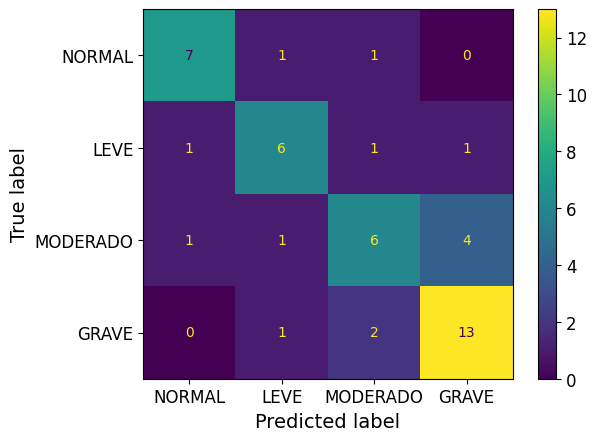


 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.67      0.67      0.67         9
           2       0.60      0.50      0.55        12
           3       0.78      0.78      0.78         9

    accuracy                           0.70        46
   macro avg       0.69      0.69      0.69        46
weighted avg       0.69      0.70      0.69        46



In [19]:
RF=RandomForestClassifier(random_state=0)
RF.fit(X_train_mod,y_train_mod)
predict=RF.predict(X_test_filtrado)
accuracy_score(predict,y_test_filtrado)

from sklearn.metrics import confusion_matrix, f1_score, classification_report

#Cálculo das métricas
print("\n Matriz de Confusão:")

labels = ["NORMAL", "LEVE", "MODERADO", "GRAVE"]
conf_matrix = confusion_matrix(y_test_filtrado, predict, labels=[3,1,2,0])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

print("\n Classification Report:")
print(classification_report(y_test_filtrado, predict))

In [20]:
bbox = sklearn_classifier_wrapper(RF)

In [21]:
#print(y_test_filtrado)
#print(predict)

In [22]:
instância = X_test_filtrado.iloc[1].values
instância.reshape(1, -1)
print('Instance ',instância)
print('True class ',y_test_filtrado.iloc[1])
print('Predicted class ', predict[1])

Instance  [ 1.60000000e-01  6.60000000e+01  3.30000000e+01  1.75000000e+00
  8.20000000e+01  2.67755102e+01  5.25132000e+01  2.89110000e+00
  4.79327000e+01  3.79094000e+01  1.12667000e+01  1.02498000e+01
  5.32769000e+01  1.59646000e+01  2.05088000e+01  4.95384000e+01
  3.88749000e+01  2.49161800e+02  1.06125000e+01  8.93875000e+01
  1.47700000e-01  7.99804100e+02  2.25713000e+01  2.35593000e+01
  4.38800000e-01  1.85370000e+00  1.82000000e+00  7.37600000e-01
  2.45170000e+00  4.70730000e+00  1.91300000e+00  8.54000000e-01
 -7.74990000e+00  9.92170000e+00  5.63111000e+01  5.56388000e+01
  9.48200000e-01  1.76199000e+01  6.39002000e+01  1.84799000e+01
  1.00000000e+00  0.00000000e+00]
True class  3
Predicted class  1


In [21]:
explainer = LoreTabularExplainer(bbox)
config = {'neigh_type':'rndgen', 'size':1000, 'ocr':0.1, 'ngen':10}
explainer.fit(dfLORE, class_field, config)
exp = explainer.explain(instância)
print(exp)

In [22]:
exp_dict_exemple=exp.expDict
print(exp_dict_exemple)

{'bb_pred': 1, 'dt_pred': 1, 'rule': {'premise': [{'att': 'T90', 'op': '<=', 'thr': 8.40580129623413, 'is_continuous': True}, {'att': 'T90', 'op': '>', 'thr': -43.97471046447754, 'is_continuous': True}, {'att': 'VLFABS', 'op': '<=', 'thr': 958.6900329589844, 'is_continuous': True}, {'att': 'PESO', 'op': '>', 'thr': 81.95000076293945, 'is_continuous': True}, {'att': 'LFNU', 'op': '<=', 'thr': 73.30535125732422, 'is_continuous': True}, {'att': 'IMC', 'op': '<=', 'thr': 37.69264793395996, 'is_continuous': True}, {'att': 'IMC', 'op': '>', 'thr': 24.032126426696777, 'is_continuous': True}, {'att': 'LFABS', 'op': '<=', 'thr': 153.09209442138672, 'is_continuous': True}, {'att': 'LFABS', 'op': '>', 'thr': 37.34402275085449, 'is_continuous': True}, {'att': 'DISPEN', 'op': '>', 'thr': 3.656422257423401, 'is_continuous': True}, {'att': 'PIP', 'op': '<=', 'thr': 76.52214050292969, 'is_continuous': True}, {'att': 'HFNU', 'op': '>', 'thr': 21.652174949645996, 'is_continuous': True}, {'att': 'W3', 'o

In [23]:
exp.plotRules()

In [24]:
exp.plotCounterfactualRules()

## AGORA IREMOS GERAR AS EXPLICAÇÕES DE TODAS AS INSTÂNCIAS CLASSIFICADAS INCORRETAMENTE NO CONJUNTO DE TESTE UTILIZANDO APENAS A INTERFACE VISUAL DO LORE
### Primeiramente criamos o nosso banco de dados apenas com as instâncias classificadas desta forma

In [23]:
y_series = pd.Series(y_test_filtrado, index=X_test_filtrado.index)  
y_pred_series = pd.Series(predict, index=X_test_filtrado.index)  

#Criando uma máscara de erro alinhada com o índice de X
mask_erros = y_series != y_pred_series  

#Selecionando as instâncias mal classificadas
df_erros = X_test_filtrado.loc[mask_erros].copy()  

#Adicionando as classes real e prevista ao DataFrame de erros
df_erros['Classe_Real'] = y_series[mask_erros].values
df_erros['Classe_Prevista'] = y_pred_series[mask_erros].values

#Removendo os dados artificiais
df_erros = df_erros[df_erros.index <= 291]
print(df_erros.shape)
df_erros

(14, 44)


,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M,Classe_Real,Classe_Prevista
5,0.16,66,33,1.75,82.0,26.775510,52.5132,2.8911,47.9327,37.9094,...,56.3111,55.6388,0.9482,17.6199,63.9002,18.4799,1.0,0.0,3,1
45,2.00,82,53,1.64,65.0,24.167162,58.2716,5.4463,29.4046,50.0357,...,51.4894,51.6891,0.4140,17.6156,60.0317,22.3527,1.0,0.0,3,2
66,0.00,90,19,1.70,84.0,29.065744,49.5526,2.4402,49.9645,44.1187,...,49.7542,51.6183,0.5455,13.7941,80.4739,9.4608,0.0,1.0,1,3
84,0.00,90,42,1.61,108.0,41.665059,54.4808,6.0207,38.3577,41.8240,...,51.3422,52.2414,0.4297,27.6741,59.3422,12.9837,1.0,0.0,1,2
104,3.70,86,52,1.60,110.0,42.968750,52.4333,5.7816,36.6588,51.9229,...,50.3840,51.5188,0.2855,15.4859,71.3783,13.1358,1.0,0.0,1,0
126,72.12,78,74,1.86,103.0,29.772228,58.8783,3.8066,30.6244,50.6932,...,49.5567,48.8569,-0.2741,14.0599,60.5869,25.3532,0.0,1.0,2,0
153,0.50,86,63,1.55,79.0,32.882414,57.2287,8.8888,32.8300,36.0311,...,52.4987,54.5233,1.2024,25.9641,47.8509,26.1850,0.0,1.0,2,0
155,0.30,85,71,1.65,83.0,30.486685,51.0654,6.1305,43.9310,40.4909,...,49.9393,50.4079,0.1676,22.5989,62.6430,14.7582,0.0,1.0,2,0
175,53.80,80,32,1.71,91.0,31.120687,42.0033,10.4117,58.6567,25.3583,...,42.6296,41.6630,-1.4911,33.7536,58.6025,7.6439,0.0,1.0,2,0
225,4.60,75,56,1.69,84.0,29.410735,55.7042,12.7601,24.9161,44.7922,...,50.4924,50.3831,0.0328,31.9263,49.8087,18.2650,0.0,1.0,0,2


In [25]:
for idx, row in df_erros.iterrows():
    print(f"\n🔹 Explicando instância {idx}...")

    # Pegando os valores da instância e a classe real/predita
    instancia = row.drop(['Classe_Real', 'Classe_Prevista']).values
    classe_real = row['Classe_Real']
    classe_predita = row['Classe_Prevista']

    print('Instance:', instancia)
    print('True class:', classe_real)
    print('Predicted class:', classe_predita)

    # Criando o explicador LORE
    explainer = LoreTabularExplainer(bbox)

    # Configuração do LORE
    config = {'neigh_type': 'rndgen', 'size': 1000, 'ocr': 0.1, 'ngen': 10}

    # Treinando o explicador
    explainer.fit(dfLORE, class_field, config)

    # Gerando a explicação
    exp = explainer.explain(instancia)
    
    exp_pred=exp.expDict
    bb_pred=exp_pred['bb_pred']
    dt_pred=exp_pred['dt_pred']
    
    print('Previsão do black-box',bb_pred, 'Previsão da decision tree', dt_pred)
    print('Fidelidade', exp_pred['fidelity'])
        
    # Salvando os gráficos de regras explicativas
    exp.plotRules()
    exp.plotCounterfactualRules()


🔹 Explicando instância 5...
Instance: [ 1.60000000e-01  6.60000000e+01  3.30000000e+01  1.75000000e+00
  8.20000000e+01  2.67755102e+01  5.25132000e+01  2.89110000e+00
  4.79327000e+01  3.79094000e+01  1.12667000e+01  1.02498000e+01
  5.32769000e+01  1.59646000e+01  2.05088000e+01  4.95384000e+01
  3.88749000e+01  2.49161800e+02  1.06125000e+01  8.93875000e+01
  1.47700000e-01  7.99804100e+02  2.25713000e+01  2.35593000e+01
  4.38800000e-01  1.85370000e+00  1.82000000e+00  7.37600000e-01
  2.45170000e+00  4.70730000e+00  1.91300000e+00  8.54000000e-01
 -7.74990000e+00  9.92170000e+00  5.63111000e+01  5.56388000e+01
  9.48200000e-01  1.76199000e+01  6.39002000e+01  1.84799000e+01
  1.00000000e+00  0.00000000e+00]
True class: 3.0
Predicted class: 1.0
Previsão do black-box 1 Previsão da decision tree 1
Fidelidade 0.9742722960521782



🔹 Explicando instância 7...
Instance: [ 3.00000000e-01  8.40000000e+01  3.70000000e+01  1.50000000e+00
  3.70000000e+01  1.64444444e+01  4.69015000e+01  1.66800000e+00
  5.74148000e+01  3.94648000e+01  1.45240000e+00  4.07400000e+00
  3.47105000e+01  3.28523000e+01  2.83631000e+01  4.37798100e+02
  6.50105400e+02  6.17025220e+03  9.58510000e+00  9.04149000e+01
  1.22700000e-01  9.20102300e+02  9.61845000e+01  1.13879600e+02
  3.56000000e-01  1.58920000e+00  1.80380000e+00  7.31300000e-01
  2.38540000e+00  4.43870000e+00  1.38040000e+00  8.64600000e-01
 -4.14324000e+01  5.78468000e+01  5.82692000e+01  6.16683000e+01
  2.11690000e+00  1.51686000e+01  7.82665000e+01  6.56490000e+00
  1.00000000e+00  0.00000000e+00]
True class: 3.0
Predicted class: 2.0
Previsão do black-box 2 Previsão da decision tree 2
Fidelidade 0.974304307638143



🔹 Explicando instância 45...
Instance: [ 2.00000000e+00  8.20000000e+01  5.30000000e+01  1.64000000e+00
  6.50000000e+01  2.41671624e+01  5.82716000e+01  5.44630000e+00
  2.94046000e+01  5.00357000e+01  1.51134000e+01  4.01334000e+01
  4.34383000e+01  3.66830000e+00  1.27601000e+01  4.27989300e+02
  1.93095000e+02  1.13026400e+02  5.91798000e+01  4.08202000e+01
  1.75760000e+00  9.61686600e+02  4.20937000e+01  1.95075000e+01
  1.34910000e+00  1.71290000e+00  1.40490000e+00  5.99300000e-01
  2.51620000e+00  4.17680000e+00  2.07850000e+00  9.21100000e-01
 -7.54420000e+00  7.95020000e+00  5.14894000e+01  5.16891000e+01
  4.14000000e-01  1.76156000e+01  6.00317000e+01  2.23527000e+01
  1.00000000e+00  0.00000000e+00]
True class: 3.0
Predicted class: 2.0
Previsão do black-box 2 Previsão da decision tree 2
Fidelidade 0.9761673292674168



🔹 Explicando instância 63...
Instance: [ 6.99000000e+01  8.30000000e+01  7.10000000e+01  1.55000000e+00
  7.20000000e+01  2.99687825e+01  6.04415000e+01  4.28490000e+00
  2.97617000e+01  4.62846000e+01  1.96688000e+01  2.14850000e+01
  4.76714000e+01  8.76720000e+00  2.20764000e+01  4.67665200e+02
  5.11295400e+02  3.44362400e+02  5.01353000e+01  4.98647000e+01
  1.72010000e+00  1.12848480e+03  4.38490000e+01  3.47469000e+01
  1.07090000e+00  1.95670000e+00  1.68430000e+00  6.45700000e-01
  2.53060000e+00  4.57330000e+00  1.90980000e+00  9.00300000e-01
 -1.08507000e+01  1.18845000e+01  5.22457000e+01  5.39058000e+01
  1.18880000e+00  1.43494000e+01  5.78476000e+01  2.78030000e+01
  1.00000000e+00  0.00000000e+00]
True class: 1.0
Predicted class: 2.0
Previsão do black-box 2 Previsão da decision tree 2
Fidelidade 0.9742621160670991



🔹 Explicando instância 66...
Instance: [ 0.00000000e+00  9.00000000e+01  1.90000000e+01  1.70000000e+00
  8.40000000e+01  2.90657439e+01  4.95526000e+01  2.44020000e+00
  4.99645000e+01  4.41187000e+01  3.47660000e+00  9.81830000e+00
  5.03655000e+01  1.86662000e+01  2.11500000e+01  8.48509900e+02
  1.41412360e+03  3.58355680e+03  2.46863000e+01  7.53137000e+01
  5.06400000e-01  9.74977100e+02  9.35776000e+01  8.93019000e+01
  7.10500000e-01  1.81590000e+00  1.90380000e+00  7.24300000e-01
  2.45870000e+00  4.69640000e+00  1.67430000e+00  9.10300000e-01
 -3.70013000e+01  3.70391000e+01  4.97542000e+01  5.16183000e+01
  5.45500000e-01  1.37941000e+01  8.04739000e+01  9.46080000e+00
  0.00000000e+00  1.00000000e+00]
True class: 1.0
Predicted class: 3.0
Previsão do black-box 3 Previsão da decision tree 3
Fidelidade 0.9714358521383386



🔹 Explicando instância 104...
Instance: [ 3.700000e+00  8.600000e+01  5.200000e+01  1.600000e+00  1.100000e+02
  4.296875e+01  5.243330e+01  5.781600e+00  3.665880e+01  5.192290e+01
  5.636700e+00  2.788540e+01  4.873980e+01  8.273600e+00  1.510120e+01
  1.501219e+03  6.627097e+02  4.939057e+02  5.323450e+01  4.676550e+01
  1.836000e+00  8.896520e+02  6.711480e+01  3.610330e+01  1.232600e+00
  1.678200e+00  1.502800e+00  6.862000e-01  2.476100e+00  4.243700e+00
  1.805400e+00  9.285000e-01 -1.500200e+01  9.933900e+00  5.038400e+01
  5.151880e+01  2.855000e-01  1.548590e+01  7.137830e+01  1.313580e+01
  1.000000e+00  0.000000e+00]
True class: 1.0
Predicted class: 0.0
Previsão do black-box 0 Previsão da decision tree 0
Fidelidade 0.9733270069143332



🔹 Explicando instância 126...
Instance: [ 7.2120000e+01  7.8000000e+01  7.4000000e+01  1.8600000e+00
  1.0300000e+02  2.9772228e+01  5.8878300e+01  3.8066000e+00
  3.0624400e+01  5.0693200e+01  1.4875800e+01  3.5480600e+01
  4.4841100e+01  2.6981000e+00  1.6980100e+01  2.0960150e+02
  1.2200890e+02  9.1340800e+01  5.1643800e+01  4.8356200e+01
  1.5036000e+00  8.1610860e+02  2.9067100e+01  1.7882600e+01
  1.2073000e+00  1.5518000e+00  1.5138000e+00  7.1520000e-01
  2.5418000e+00  4.3341000e+00  1.9625000e+00  9.1600000e-01
 -5.7719000e+00  5.6918000e+00  4.9556700e+01  4.8856900e+01
 -2.7410000e-01  1.4059900e+01  6.0586900e+01  2.5353200e+01
  0.0000000e+00  1.0000000e+00]
True class: 2.0
Predicted class: 0.0
Previsão do black-box 0 Previsão da decision tree 0
Fidelidade 0.9723579549280366



🔹 Explicando instância 153...
Instance: [ 5.00000000e-01  8.60000000e+01  6.30000000e+01  1.55000000e+00
  7.90000000e+01  3.28824142e+01  5.72287000e+01  8.88880000e+00
  3.28300000e+01  3.60311000e+01  2.22501000e+01  4.29785000e+01
  4.17740000e+01  3.60460000e+00  1.16429000e+01  5.07226600e+02
  3.39713600e+02  1.95667800e+02  6.17754000e+01  3.82246000e+01
  2.10090000e+00  9.18886400e+02  4.14398000e+01  2.45811000e+01
  1.22700000e+00  1.65700000e+00  1.39680000e+00  5.90300000e-01
  2.48440000e+00  4.26300000e+00  2.47780000e+00  9.19400000e-01
 -8.97290000e+00  6.43050000e+00  5.24987000e+01  5.45233000e+01
  1.20240000e+00  2.59641000e+01  4.78509000e+01  2.61850000e+01
  0.00000000e+00  1.00000000e+00]
True class: 2.0
Predicted class: 0.0
Previsão do black-box 0 Previsão da decision tree 0
Fidelidade 0.9780692047189411



🔹 Explicando instância 168...
Instance: [ 1.00000000e+01  7.90000000e+01  3.70000000e+01  1.68000000e+00
  1.15000000e+02  4.07454649e+01  6.87781000e+01  6.59000000e-01
  1.68776000e+01  5.79558000e+01  2.45076000e+01  2.64671000e+01
  4.19935000e+01  7.62970000e+00  2.39096000e+01  6.06448000e+01
  2.64601000e+01  5.51270000e+01  5.01479000e+01  4.98521000e+01
  1.54690000e+00  7.67033400e+02  1.66220000e+01  1.33839000e+01
  1.06260000e+00  2.07340000e+00  1.67190000e+00  4.84600000e-01
  2.52150000e+00  4.48300000e+00  1.73240000e+00  8.73000000e-01
 -4.48750000e+00  2.20980000e+00  4.64204000e+01  4.62836000e+01
 -5.56400000e-01  1.04024000e+01  6.10602000e+01  2.85373000e+01
  1.00000000e+00  0.00000000e+00]
True class: 2.0
Predicted class: 1.0
Previsão do black-box 1 Previsão da decision tree 1
Fidelidade 0.9704632383613094



🔹 Explicando instância 225...
Instance: [ 4.60000000e+00  7.50000000e+01  5.60000000e+01  1.69000000e+00
  8.40000000e+01  2.94107349e+01  5.57042000e+01  1.27601000e+01
  2.49161000e+01  4.47922000e+01  1.75317000e+01  6.09507000e+01
  3.20351000e+01  2.12750000e+00  4.88670000e+00  5.80590700e+02
  2.02796300e+02  3.31570000e+01  8.45200000e+01  1.54800000e+01
  6.03430000e+00  8.91738300e+02  5.08075000e+01  1.26421000e+01
  1.68080000e+00  8.42900000e-01  6.87600000e-01  6.12900000e-01
  2.42700000e+00  3.14000000e+00  2.78640000e+00  8.92100000e-01
 -6.70630000e+00  6.97080000e+00  5.04924000e+01  5.03831000e+01
  3.28000000e-02  3.19263000e+01  4.98087000e+01  1.82650000e+01
  0.00000000e+00  1.00000000e+00]
True class: 0.0
Predicted class: 2.0
Previsão do black-box 2 Previsão da decision tree 2
Fidelidade 0.9771304095098073



🔹 Explicando instância 245...
Instance: [ 0.00000000e+00  8.90000000e+01  6.30000000e+01  1.65000000e+00
  7.40000000e+01  2.71808999e+01  5.20975000e+01  5.57070000e+00
  4.18827000e+01  4.32181000e+01  9.32840000e+00  4.37961000e+01
  4.17611000e+01  3.97330000e+00  1.04695000e+01  6.76006600e+02
  2.83884500e+02  3.39071800e+02  4.84052000e+01  5.15948000e+01
  9.83800000e-01  9.94529500e+02  7.18880000e+01  3.08971000e+01
  1.13690000e+00  1.41280000e+00  1.22210000e+00  6.70200000e-01
  2.46340000e+00  3.94210000e+00  2.18820000e+00  9.25500000e-01
 -1.22854000e+01  1.36735000e+01  5.29462000e+01  5.23220000e+01
  4.49700000e-01  2.00581000e+01  6.53274000e+01  1.46145000e+01
  0.00000000e+00  1.00000000e+00]
True class: 0.0
Predicted class: 3.0
Previsão do black-box 3 Previsão da decision tree 3
Fidelidade 0.9790295678885295



🔹 Explicando instância 246...
Instance: [ 1.00000000e+02  5.20000000e+01  6.90000000e+01  1.49000000e+00
  6.50000000e+01  2.92779605e+01  5.45741000e+01  4.26370000e+00
  4.15767000e+01  4.03610000e+01  1.37986000e+01  4.30333000e+01
  4.44634000e+01  3.17380000e+00  9.32950000e+00  1.62045000e+02
  8.14595000e+01  1.74782100e+02  4.04843000e+01  5.95157000e+01
  8.91300000e-01  7.62391100e+02  3.25263000e+01  1.75890000e+01
  1.01340000e+00  1.79870000e+00  1.36670000e+00  5.62900000e-01
  2.45140000e+00  4.15490000e+00  2.32520000e+00  9.21500000e-01
 -7.92180000e+00  8.44350000e+00  5.15629000e+01  5.17692000e+01
  3.06900000e-01  2.28723000e+01  6.31073000e+01  1.40204000e+01
  1.00000000e+00  0.00000000e+00]
True class: 0.0
Predicted class: 2.0
Previsão do black-box 2 Previsão da decision tree 2
Fidelidade 0.9780769665249631



🔹 Explicando instância 68...
Instance: [ 1.00000000e-01  8.90000000e+01  3.10000000e+01  1.64923358e+00
  8.92620072e+01  3.28172596e+01  5.82102000e+01  2.30710000e+00
  3.07239000e+01  5.70552000e+01  9.91380000e+00  2.17522000e+01
  4.78367000e+01  9.91740000e+00  2.04937000e+01  2.82878800e+02
  2.26884500e+02  1.70527500e+02  4.61517000e+01  5.38483000e+01
  1.44730000e+00  1.00220250e+03  3.05938000e+01  2.24444000e+01
  1.13300000e+00  1.93600000e+00  1.74700000e+00  5.59000000e-01
  2.52450000e+00  4.66640000e+00  1.65170000e+00  9.17900000e-01
 -8.91270000e+00  8.78410000e+00  4.95430000e+01  5.00224000e+01
  7.56000000e-02  1.03277000e+01  7.33541000e+01  1.63182000e+01
  0.00000000e+00  1.00000000e+00]
True class: 1.0
Predicted class: 3.0
Previsão do black-box 3 Previsão da decision tree 3
Fidelidade 0.9761688581249817



🔹 Explicando instância 142...
Instance: [ 0.00000000e+00  9.30000000e+01  6.30000000e+01  1.80000000e+00
  7.15000000e+01  2.20679012e+01  5.54525000e+01  1.25270000e+00
  4.25429000e+01  4.48191000e+01  1.13853000e+01  1.62466000e+01
  5.50609000e+01  1.11731000e+01  1.75195000e+01  1.45511300e+02
  5.34674000e+01  3.34272700e+02  1.73053000e+01  8.26947000e+01
  2.16100000e-01  1.01560450e+03  3.14209000e+01  2.54471000e+01
  6.81100000e-01  2.12670000e+00  1.84460000e+00  5.39800000e-01
  2.48030000e+00  4.66680000e+00  1.83240000e+00  9.21100000e-01
 -9.93410000e+00  1.11683000e+01  5.24498000e+01  5.37891000e+01
  8.18200000e-01  1.51428000e+01  7.11400000e+01  1.37172000e+01
  1.00000000e+00  0.00000000e+00]
True class: 2.0
Predicted class: 3.0
Previsão do black-box 3 Previsão da decision tree 3
Fidelidade 0.9742667242981258



🔹 Explicando instância 178...
Instance: [ 2.00000000e-01  8.80000000e+01  3.60000000e+01  1.50000000e+00
  7.90000000e+01  3.51111111e+01  4.74711000e+01  8.63540000e+00
  4.42735000e+01  4.31601000e+01  3.93100000e+00  2.57519000e+01
  5.11876000e+01  9.56580000e+00  1.34947000e+01  3.45665420e+03
  1.34894430e+03  4.72948600e+02  5.35084000e+01  4.64916000e+01
  2.76900000e+00  8.37713800e+02  7.53948000e+01  3.62813000e+01
  1.34930000e+00  1.42400000e+00  1.38310000e+00  6.92800000e-01
  2.40140000e+00  4.09570000e+00  1.88980000e+00  9.15600000e-01
 -1.79116000e+01  2.66192000e+01  4.78259000e+01  4.92332000e+01
  4.88000000e-02  1.97398000e+01  7.08938000e+01  9.36640000e+00
  1.00000000e+00  0.00000000e+00]
True class: 2.0
Predicted class: 0.0
Previsão do black-box 0 Previsão da decision tree 0
Fidelidade 0.9780908343399497


## GERANDO AS EXPLICAÇÕES DE TODAS AS INSTÂNCIAS CLASSIFICADAS INCORRETAMENTE E SALVANDO UM ARQUIVO txt. CONTENDO DICIONÁRIOS COM AS EXPLICAÇÕES DE CADA INSTÂNCIA PARA POSTERIOR ACESSO E UTILIZAÇÃO EM DIFERENTES ESTATÍSTICAS
O CÓDIGO TAMBÉM JÁ REALIZA A CONTAGEM DOS PARÂMETROS QUE MAIS APARECEM NAS EXPLICAÇÕES

In [34]:
import os
#Criar uma pasta para salvar as explicações
os.makedirs("explicacoes_erros_dict", exist_ok=True)

In [35]:
from collections import Counter

In [ ]:
todos_os_atributos = []
for idx, row in df_erros.iterrows():
    print(f"\n🔹 Explicando instância {idx}...")

    # Pegando os valores da instância e a classe real/predita
    instancia = row.drop(['Classe_Real', 'Classe_Prevista']).values
    classe_real = row['Classe_Real']
    classe_predita = row['Classe_Prevista']

    print('Instance:', instancia)
    print('True class:', classe_real)
    print('Predicted class:', classe_predita)

    # Criando o explicador LORE
    explainer = LoreTabularExplainer(bbox)

    # Configuração do LORE
    config = {'neigh_type': 'rndgen', 'size': 1000, 'ocr': 0.1, 'ngen': 10}

    # Treinando o explicador
    explainer.fit(dfLORE, class_field, config)

    # Gerando a explicação
    exp = explainer.explain(instancia)
    
    exp_dict = exp.expDict['rule']
    premises = exp_dict['premise']
    
    exp_pred=exp.expDict
    bb_pred=exp_pred['bb_pred']
    dt_pred=exp_pred['dt_pred']
    
    print('Previsão do black-box',bb_pred, 'Previsão da decision tree', dt_pred)
    print('Fidelidade', exp_pred['fidelity'])
    
    attributes = [premise['att'] for premise in premises]
    todos_os_atributos.extend(attributes)
    
    for premise in premises:
        att = premise['att']  # Nome do atributo
        op = premise['op']  # Operador
        thr = premise['thr']  # Limite da condição
        print(f"Condição: {att} {op} {thr}")
    
    with open(f"explicacoes_erros_dict/explicacao_{idx}.txt", "w") as f:
        f.write(str(exp_dict))
    with open(f"explicacoes_erros_dict/predições_{idx}.txt", "w") as f:
        f.write(str(exp_pred))

# Após todas as iterações, contar a frequência dos atributos
attribute_counts = Counter(todos_os_atributos)

# Convertendo a contagem para um DataFrame
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Atributo', 'Frequência'])
# Ordenando em ordem decrescente pela frequência
attribute_counts_df = attribute_counts_df.sort_values(by='Frequência', ascending=False)
# Salvando o DataFrame em um arquivo CSV
attribute_counts_df.to_csv('atributos_contagem.csv', index=False)

# Exibindo o DataFrame ordenado
print("\n🔹 Frequência dos Atributos (ordenados):")
print(attribute_counts_df)

print("\n🔹 Frequência dos Atributos:")
for att, count in attribute_counts.items():
    print(f"Atributo: {att}, Frequência: {count}")


In [38]:
import os
import ast

# Diretório onde os arquivos estão salvos
diretorio = "explicacoes_erros_dict"

# Lista para armazenar todos os atributos
todos_os_atributos = []

# Percorre todos os arquivos no diretório
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # Lê o conteúdo do arquivo e converte de string para dicionário
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicionário

    # Obtém a lista de premissas
    premises = exp_dict['premise']

    # Coleta os atributos
    attributes = [premise['att'] for premise in premises]
    todos_os_atributos.extend(attributes)

    exp_pred=exp.expDict
    bb_pred=exp_pred['bb_pred']
    dt_pred=exp_pred['dt_pred']

    # Exibe as condições
    for premise in premises:
        att = premise['att']
        op = premise['op']
        thr = premise['thr']
        
# Após todas as iterações, contar a frequência dos atributos
attribute_counts = Counter(todos_os_atributos)

# Convertendo a contagem para um DataFrame
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Atributo', 'Frequência'])
# Ordenando em ordem decrescente pela frequência
attribute_counts_df = attribute_counts_df.sort_values(by='Frequência', ascending=False)
# Salvando o DataFrame em um arquivo CSV
attribute_counts_df.to_csv('atributos_contagem_erros.csv', index=False)

# Exibindo o DataFrame ordenado
print("\n🔹 Frequência dos Atributos (ordenados):")
print(attribute_counts_df)


🔹 Frequência dos Atributos (ordenados):
   Atributo  Frequência
0    VLFABS          16
10   SATMIN          13
1       T90          12
2       IMC          11
3      PESO           9
13  PHASEEN           6
19       W1           6
25   MEANRR           5
20   PORTAS           5
8    ALTURA           5
9         F           5
18    BIN0V           5
26   GUZIKS           5
5     IDADE           4
14   DISPEN           4
30   PERMEN           4
24   EHLERS           4
12     LFNU           4
35       W3           4
7        DC           4
4      HFNU           3
6   SYMB2UV           3
11   DISTEN           3
15       W0           3
22   SAMPEN           3
16      PIP           3
17  FUZZYEN           3
31       AC           3
27     SDNN           3
32    LFABS           3
21    ATTEN           2
36       W2           2
29   SYMB1V           2
23     LFHF           2
33    BIN1V           2
28   SYMB0V           1
34     DFA            1
37    BIN2V           1
38  SYMB2LV           1

In [24]:
count = pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/atributos_contagem_erros.csv')
count.head(10)

,Atributo,Frequência
0,VLFABS,16
1,SATMIN,13
2,T90,12
3,IMC,11
4,PESO,9
5,PHASEEN,6
6,W1,6
7,MEANRR,5
8,PORTAS,5
9,ALTURA,5


## GERANDO AS EXPLICAÇÕES E O BANCO DE DADOS COM TODAS AS INSTÂNCIAS CLASSIFICADAS CORRETAMENTE E SALVANDO UM ARQUIVO txt. CONTENDO DICIONÁRIOS COM AS EXPLICAÇÕES DE CADA INSTÂNCIA PARA POSTERIOR ACESSO E UTILIZAÇÃO EM DIFERENTES ESTATÍSTICAS
O CÓDIGO TAMBÉM JÁ REALIZA A CONTAGEM DOS PARÂMETROS QUE MAIS APARECEM NAS EXPLICAÇÕES

In [25]:
y_series = pd.Series(y_test_filtrado, index=X_test_filtrado.index)  
y_pred_series = pd.Series(predict, index=X_test_filtrado.index)  

# Criando uma máscara de erro alinhada com o índice de X
mask_acertos = y_series == y_pred_series  

# Selecionando as instâncias mal classificadas
df_acertos = X_test_filtrado.loc[mask_acertos].copy()  

# Adicionando as classes real e prevista ao DataFrame de erros
df_acertos['Classe_Real'] = y_series[mask_acertos].values
df_acertos['Classe_Prevista'] = y_pred_series[mask_acertos].values

#Removendo os dados artificiais
df_acertos = df_acertos[df_acertos.index <= 290]
print(df_acertos.shape)
df_acertos

(32, 44)


,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M,Classe_Real,Classe_Prevista
3,1.37,41,61,1.590000,103.700000,41.018947,60.8169,5.6235,20.4419,59.7282,...,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0,3,3
7,0.30,84,37,1.500000,37.000000,16.444444,46.9015,1.6680,57.4148,39.4648,...,58.2692,61.6683,2.1169,15.1686,78.2665,6.5649,1.0,0.0,3,3
16,5.40,83,30,1.660000,102.100000,37.051822,49.8926,3.1941,50.6341,39.5485,...,51.8063,52.1008,0.4026,20.9710,72.0188,7.0102,1.0,0.0,3,3
18,0.00,91,18,1.450000,58.100000,27.633769,63.4614,1.1389,28.6466,48.9592,...,54.5138,56.4734,1.2044,13.8953,61.3030,24.8018,1.0,0.0,3,3
26,0.00,91,22,1.750000,71.000000,23.183673,52.4297,4.6797,40.6004,47.4739,...,47.1691,46.9348,-0.5084,18.6403,66.6138,14.7459,0.0,1.0,3,3
29,0.60,86,64,1.570000,62.000000,25.153150,62.4740,0.8395,28.1406,53.6557,...,49.1492,49.5569,-0.1242,13.0416,68.5200,18.4385,1.0,0.0,3,3
31,0.00,90,30,1.650000,65.000000,23.875115,52.1307,2.9719,45.8610,42.9444,...,49.2063,51.0837,0.3792,17.3201,69.9047,12.7752,1.0,0.0,3,3
60,98.00,82,78,1.520000,50.000000,21.641274,77.6891,1.3591,10.4249,41.9608,...,50.4287,50.2386,0.0144,14.7621,50.8629,34.3751,1.0,0.0,1,1
63,69.90,83,71,1.550000,72.000000,29.968783,60.4415,4.2849,29.7617,46.2846,...,52.2457,53.9058,1.1888,14.3494,57.8476,27.8030,1.0,0.0,1,1
94,49.40,82,64,1.700000,90.700000,31.384083,55.2820,3.1350,38.1566,48.4348,...,47.7526,48.9877,0.5934,16.7716,68.6323,14.5961,0.0,1.0,1,1


In [42]:
import os
# Criar uma pasta para salvar as explicações
os.makedirs("explicacoes_acertos_dict", exist_ok=True)

In [43]:
todos_os_atributos = []
for idx, row in df_acertos.iterrows():
    print(f"\n🔹 Explicando instância {idx}...")

    # Pegando os valores da instância e a classe real/predita
    instancia = row.drop(['Classe_Real', 'Classe_Prevista']).values
    classe_real = row['Classe_Real']
    classe_predita = row['Classe_Prevista']

    print('Instance:', instancia)
    print('True class:', classe_real)
    print('Predicted class:', classe_predita)

    # Criando o explicador LORE
    explainer = LoreTabularExplainer(bbox)

    # Configuração do LORE
    config = {'neigh_type': 'rndgen', 'size': 1000, 'ocr': 0.1, 'ngen': 10}

    # Treinando o explicador
    explainer.fit(dfLORE, class_field, config)

    # Gerando a explicação
    exp = explainer.explain(instancia)
    exp_dict = exp.expDict['rule']
    premises = exp_dict['premise']

    exp_pred=exp.expDict
    bb_pred=exp_pred['bb_pred']
    dt_pred=exp_pred['dt_pred']
    print('Fidelidade', exp_pred['fidelity'])
    print('Previsão do black-box',bb_pred, 'Previsão da decision tree', dt_pred)
    
    attributes = [premise['att'] for premise in premises]
    todos_os_atributos.extend(attributes)
    
    for premise in premises:
        att = premise['att']  # Nome do atributo
        op = premise['op']  # Operador
        thr = premise['thr']  # Limite da condição
        print(f"Condição: {att} {op} {thr}")
    
    with open(f"explicacoes_acertos_dict/explicacao_{idx}.txt", "w") as f:
        f.write(str(exp_dict))

# Após todas as iterações, contar a frequência dos atributos
attribute_counts = Counter(todos_os_atributos)

# Convertendo a contagem para um DataFrame
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Atributo', 'Frequência'])
# Ordenando em ordem decrescente pela frequência
attribute_counts_df = attribute_counts_df.sort_values(by='Frequência', ascending=False)
# Salvando o DataFrame em um arquivo CSV
attribute_counts_df.to_csv('atributos_contagem.csv', index=False)

# Exibindo o DataFrame ordenado
print("\n🔹 Frequência dos Atributos (ordenados):")
print(attribute_counts_df)

print("\n🔹 Frequência dos Atributos:")
for att, count in attribute_counts.items():
    print(f"Atributo: {att}, Frequência: {count}")


🔹 Explicando instância 3...
Instance: [ 1.3700000e+00  4.1000000e+01  6.1000000e+01  1.5900000e+00
  1.0370000e+02  4.1018947e+01  6.0816900e+01  5.6235000e+00
  2.0441900e+01  5.9728200e+01  1.4206400e+01  2.9162400e+01
  4.2385400e+01  5.3418000e+00  2.3110400e+01  9.1004560e+02
  9.8676000e+02  8.1554070e+02  5.3714200e+01  4.6285800e+01
  2.6135000e+00  9.5345660e+02  7.9409800e+01  5.1676900e+01
  1.1815000e+00  1.7886000e+00  1.5292000e+00  8.3210000e-01
  2.5598000e+00  4.3509000e+00  1.7214000e+00  9.1010000e-01
 -1.4581200e+01  1.4479600e+01  5.0045700e+01  5.0284800e+01
  9.6000000e-02  1.1294600e+01  5.8485500e+01  3.0219800e+01
  1.0000000e+00  0.0000000e+00]
True class: 3.0
Predicted class: 3.0
Fidelidade 0.9752142138044461
Previsão do black-box 3 Previsão da decision tree 3
Condição: T90 <= 2.9268232583999634
Condição: DISTEN > 0.7897553443908691
Condição: LFABS > 831.7861022949219
Condição: VLFABS <= 968.7413635253906
Condição: F <= 1.0466070175170898
Condição: F > 0.76

In [26]:
count_acertos = pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/atributos_contagem_acertos.csv')
count_acertos.head(10)

,Atributo,Frequência
0,T90,35
1,VLFABS,27
2,SATMIN,23
3,PESO,18
4,BIN2V,10
5,IDADE,9
6,BIN1V,9
7,PERMEN,9
8,F,9
9,FUZZYEN,8


## ACESSANDO AS PASTAS COM OS DICIONÁRIOS SALVOS EM txt. PARA DETERMINAR QUAIS SÃO OS PARÂMETROS QUE APARECEM MAIS EM PRIMEIRO, SEGUNDO, TERCEIRO, QUARTO, E QUINTO LUGAR NAS EXPLICAÇÕES

In [47]:
import os
import ast
from collections import Counter

# Diretório onde os arquivos estão salvos
diretorio = "explicacoes_erros_dict"

# Dicionários para contar a frequência de cada atributo em cada posição
posicao_contadores = {1: Counter(), 2: Counter(), 3: Counter(), 4:Counter(), 5:Counter()}

# Percorre todos os arquivos no diretório
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # Lê o conteúdo do arquivo e converte de string para dicionário
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicionário

    # Obtém a lista de premissas
    premises = exp_dict['premise']

    # Atualiza os contadores para as três primeiras posições
    for i in range(1, 6):  # Considera apenas as três primeiras posições
        if len(premises) >= i:
            att = premises[i - 1]['att']  # Pega o nome do atributo
            posicao_contadores[i][att] += 1

# Exibir os atributos mais frequentes em cada posição
for posicao, contador in posicao_contadores.items():
    if contador:
        atributo_mais_frequente, frequencia = contador.most_common(1)[0]
        print(f"Atributo mais frequente na posição {posicao}: {atributo_mais_frequente} ({frequencia} vezes)")

Atributo mais frequente na posição 1: VLFABS (9 vezes)
Atributo mais frequente na posição 2: VLFABS (5 vezes)
Atributo mais frequente na posição 3: IMC (4 vezes)
Atributo mais frequente na posição 4: PESO (4 vezes)
Atributo mais frequente na posição 5: LFNU (2 vezes)


In [46]:
import os
import ast
from collections import Counter

# Diretório onde os arquivos estão salvos
diretorio = "explicacoes_acertos_dict"

# Dicionários para contar a frequência de cada atributo em cada posição
posicao_contadores = {1: Counter(), 2: Counter(), 3: Counter(), 4:Counter(), 5:Counter()}

# Percorre todos os arquivos no diretório
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # Lê o conteúdo do arquivo e converte de string para dicionário
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicionário

    # Obtém a lista de premissas
    premises = exp_dict['premise']

    # Atualiza os contadores para as três primeiras posições
    for i in range(1, 6):  # Considera apenas as três primeiras posições
        if len(premises) >= i:
            att = premises[i - 1]['att']  # Pega o nome do atributo
            posicao_contadores[i][att] += 1

# Exibir os atributos mais frequentes em cada posição
for posicao, contador in posicao_contadores.items():
    if contador:
        atributo_mais_frequente, frequencia = contador.most_common(1)[0]
        print(f"Atributo mais frequente na posição {posicao}: {atributo_mais_frequente} ({frequencia} vezes)")

Atributo mais frequente na posição 1: VLFABS (16 vezes)
Atributo mais frequente na posição 2: T90 (12 vezes)
Atributo mais frequente na posição 3: SATMIN (8 vezes)
Atributo mais frequente na posição 4: T90 (5 vezes)
Atributo mais frequente na posição 5: PESO (4 vezes)


## CRIANDO UM ARQUIVO .CSV QUE CONTÉM AS EXPLICAÇÕES DE TODAS AS INSTÂNCIAS AO LONGO DE UMA LINHA SENDO QUE AS DUAS PRIMEIRAS COLUNAS SE REFEREM À CLASSE REAL E À CLASSE PREVISTA PELO MODELO, E AS COLUNAS SUBSEQUENTE INDICAM O ATRIBUTO, O OPERADOR E O VALOR CONSIDERADO PARA CADA UMA DAS PREMISSAS DA EPXLICAÇÃO

In [48]:
# Diretório onde os arquivos estão salvos
diretorio = "explicacoes_erros_dict"

# Lista para armazenar os dados de cada indivíduo
dados = []

# Percorre todos os arquivos no diretório
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # Extrair o índice do indivíduo a partir do nome do arquivo
    idx = int(nome_arquivo.split("_")[-1].split(".")[0])

    # Lê o conteúdo do arquivo e converte de string para dicionário
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicionário

    # Obtém a lista de premissas
    premises = exp_dict.get('premise', [])

    # Obtém a classe real e prevista do DataFrame df_erros
    class_real = df_erros.loc[idx, "Classe_Real"] if idx in df_erros.index else "UNKNOWN"
    class_pred = df_erros.loc[idx, "Classe_Prevista"] if idx in df_erros.index else "UNKNOWN"

    # Criar um dicionário para armazenar os dados desse indivíduo
    individuo = {
        "Arquivo": nome_arquivo,
        "Classe_Real": class_real,
        "Classe_Prevista": class_pred
    }

    # Adicionar as premissas como colunas separadas
    for i, premise in enumerate(premises):
        att = premise['att']  # Nome do atributo
        op = premise['op']  # Operador
        thr = premise['thr']  # Limite da condição

        # Criando colunas para cada posição das premissas
        individuo[f"Premissa_{i+1}_Atributo"] = att
        individuo[f"Premissa_{i+1}_Operador"] = op
        individuo[f"Premissa_{i+1}_Valor"] = thr

    # Adiciona o dicionário à lista de dados
    dados.append(individuo)

# Criar um DataFrame do Pandas com os dados
df = pd.DataFrame(dados)

# Salvar em um arquivo CSV
df.to_csv("explicacoes_ERROS_LORE.csv", index=False)

# ERROS

In [50]:
explicações_erros=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/explicacoes_ERROS_LORE.csv')
explicações_erros.iloc[:, :21] 

,Arquivo,Classe_Real,Classe_Prevista,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,...,Premissa_3_Valor,Premissa_4_Atributo,Premissa_4_Operador,Premissa_4_Valor,Premissa_5_Atributo,Premissa_5_Operador,Premissa_5_Valor,Premissa_6_Atributo,Premissa_6_Operador,Premissa_6_Valor
0,explicacao_104.txt,1,0,VLFABS,>,901.481567,T90,>,0.227779,IMC,...,25.958414,PESO,>,90.610786,HFNU,>,14.093410,IDADE,<=,80.803146
1,explicacao_126.txt,2,0,VLFABS,<=,928.507172,VLFABS,>,170.553711,SATMIN,...,85.185787,DISTEN,>,0.714018,LFNU,<=,54.174101,PHASEEN,>,0.890120
2,explicacao_142.txt,2,3,T90,<=,0.177735,SATMIN,>,91.331875,IMC,...,32.335539,BIN0V,<=,29.777698,W1,>,25.511170,DISPEN,<=,4.863367
3,explicacao_153.txt,2,0,VLFABS,<=,948.837372,VLFABS,>,109.967548,SATMIN,...,85.185909,PESO,<=,119.000000,PORTAS,<=,56.658281,PORTAS,>,52.112991
4,explicacao_168.txt,2,1,VLFABS,<=,971.670013,T90,>,1.728325,PORTAS,...,46.492085,EHLERS,<=,-0.412750,DC,<=,9.516919,MEANRR,<=,861.026031
5,explicacao_178.txt,2,0,T90,>,0.177735,VLFABS,>,934.894470,GUZIKS,...,51.010254,F,<=,1.311236,SYMB2UV,<=,34.891655,SDNN,<=,115.625866
6,explicacao_225.txt,0,2,SYMB0V,>,57.075691,SYMB1V,<=,39.455595,MEANRR,...,863.930267,SATMIN,<=,86.500000,VLFABS,<=,1496.909607,NaN,NaN,NaN
7,explicacao_245.txt,0,3,VLFABS,<=,971.670013,T90,<=,0.115334,PERMEN,...,2.371732,SATMIN,>,86.251732,IMC,<=,32.494726,BIN0V,<=,35.895041
8,explicacao_246.txt,0,2,VLFABS,<=,928.507172,SATMIN,<=,84.319088,T90,...,0.250000,DC,<=,9.377695,IMC,<=,31.050854,PESO,<=,102.630058
9,explicacao_45.txt,3,2,VLFABS,<=,958.690033,VLFABS,>,-786.930786,IMC,...,25.187278,IMC,>,24.149249,SATMIN,<=,84.061604,SATMIN,>,62.967016


In [51]:
# Diretório onde os arquivos estão salvos
diretorio = "explicacoes_acertos_dict"

# Lista para armazenar os dados de cada indivíduo
dados = []

# Percorre todos os arquivos no diretório
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # Extrair o índice do indivíduo a partir do nome do arquivo
    idx = int(nome_arquivo.split("_")[-1].split(".")[0])

    # Lê o conteúdo do arquivo e converte de string para dicionário
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicionário

    # Obtém a lista de premissas
    premises = exp_dict.get('premise', [])

    # Obtém a classe real e prevista do DataFrame 
    class_real = df_acertos.loc[idx, "Classe_Real"] if idx in df_acertos.index else "UNKNOWN"
    class_pred = df_acertos.loc[idx, "Classe_Prevista"] if idx in df_acertos.index else "UNKNOWN"

    # Criar um dicionário para armazenar os dados desse indivíduo
    individuo = {
        "Arquivo": nome_arquivo,
        "Classe_Real": class_real,
        "Classe_Prevista": class_pred
    }

    # Adicionar as premissas como colunas separadas
    for i, premise in enumerate(premises):
        att = premise['att']  # Nome do atributo
        op = premise['op']  # Operador
        thr = premise['thr']  # Limite da condição

        # Criando colunas para cada posição das premissas
        individuo[f"Premissa_{i+1}_Atributo"] = att
        individuo[f"Premissa_{i+1}_Operador"] = op
        individuo[f"Premissa_{i+1}_Valor"] = thr

    # Adiciona o dicionário à lista de dados
    dados.append(individuo)

# Criar um DataFrame do Pandas com os dados
df = pd.DataFrame(dados)

# Salvar em um arquivo CSV
df.to_csv("explicacoes_ACERTOS_LORE.csv", index=False)

# ACERTOS

In [27]:
explicações_acertos=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/explicacoes_ACERTOS_LORE.csv')
explicações_acertos.iloc[:, :21] 

,Arquivo,Classe_Real,Classe_Prevista,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,...,Premissa_3_Valor,Premissa_4_Atributo,Premissa_4_Operador,Premissa_4_Valor,Premissa_5_Atributo,Premissa_5_Operador,Premissa_5_Valor,Premissa_6_Atributo,Premissa_6_Operador,Premissa_6_Valor
0,explicacao_108.txt,1,1,T90,<=,3.841268,T90,>,0.060734,SATMIN,...,87.456833,W2,<=,63.802000,LFNU,<=,77.296135,LFHF,<=,23.087424
1,explicacao_110.txt,2,2,VLFABS,<=,928.507172,T90,>,2.926823,BIN1V,...,61.543846,SATMIN,<=,83.111969,PIP,<=,48.326727,IMC,<=,29.201411
2,explicacao_152.txt,2,2,VLFABS,<=,928.507172,T90,<=,0.115334,DISPEN,...,3.778761,PESO,<=,73.084728,BIN0V,>,31.183064,ATTEN,>,1.966211
3,explicacao_155.txt,2,2,VLFABS,<=,934.894470,SATMIN,<=,85.606350,SATMIN,...,81.622208,T90,>,0.221840,PESO,<=,91.968098,BIN1V,>,62.518845
4,explicacao_156.txt,2,2,VLFABS,<=,922.753387,T90,<=,23.346469,T90,...,0.250000,SATMIN,<=,84.945248,PESO,<=,94.537067,W1,<=,39.927101
5,explicacao_159.txt,2,2,VLFABS,<=,958.690033,SATMIN,<=,61.103558,SATMIN,...,47.952692,PESO,<=,104.080059,DFA,<=,1.269662,SYMB2LV,>,7.325443
6,explicacao_16.txt,3,3,IDADE,<=,31.228379,MEANRR,<=,730.241821,F,...,0.793066,T90,<=,45.732393,SAMPEN,>,1.618902,DC,>,-0.868695
7,explicacao_161.txt,2,2,VLFABS,<=,928.507172,SATMIN,<=,84.669060,PESO,...,117.828819,T90,>,0.221840,W0,<=,2.297391,GUZIKS,>,45.011448
8,explicacao_175.txt,2,2,T90,>,16.974019,VLFABS,>,1028.424377,W3,...,8.830646,PESO,<=,99.779816,BIN2V,<=,11.106823,FUZZYEN,>,1.445660
9,explicacao_18.txt,3,3,T90,<=,0.115334,IDADE,<=,31.437823,GUZIKS,...,46.643642,ALTURA,<=,1.790310,FUZZYEN,<=,2.252702,W3,<=,29.597697


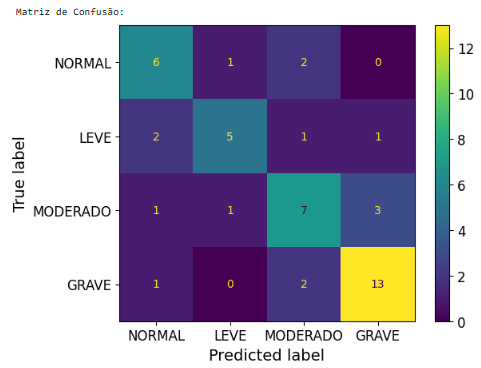

# Explicações nos casos em que a classe prevista foi 0 (GRAVE) e a classe real era 3 (NORMAL) na tabela explicações_erros
## Neste caso é interessante verificar os counterfactuals
## Como podemos ver na explicação, o classificador não análisa o VLFABS para classificar a instância no caso deste erro absurdo

In [53]:
caminho_arquivo = 'C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/explicacoes_ERROS_LORE.csv'
explicacoes = pd.read_csv(caminho_arquivo)

# Filtrar as instâncias mal classificadas (Classe_Real = 3, Classe_Prevista = 0)
mask_GRAVE_NORMAL = (explicacoes['Classe_Real'] == 3) & (explicacoes['Classe_Prevista'] == 0)

# Criar o DataFrame com os erros
df_GRAVE_NORMAL = explicacoes.loc[mask_GRAVE_NORMAL].copy()

# Exibir as primeiras linhas do resultado
print(df_GRAVE_NORMAL.shape)
df_GRAVE_NORMAL.iloc[:, :21].head()

(0, 87)


,Arquivo,Classe_Real,Classe_Prevista,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,...,Premissa_3_Valor,Premissa_4_Atributo,Premissa_4_Operador,Premissa_4_Valor,Premissa_5_Atributo,Premissa_5_Operador,Premissa_5_Valor,Premissa_6_Atributo,Premissa_6_Operador,Premissa_6_Valor


# Explicações nos casos em que a classe prevista foi 3 (NORMAL) e a classe real era 0 (GRAVE) na tabela explicações_erros
## Neste caso sera interessante verificar os counterfactuals

In [54]:
caminho_arquivo = 'C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/explicacoes_ERROS_LORE.csv'
explicacoes = pd.read_csv(caminho_arquivo)

mask_NORMAL_GRAVE = (explicacoes['Classe_Real'] == 0) & (explicacoes['Classe_Prevista'] == 3)

# Criar o DataFrame com os erros
df_NORMAL_GRAVE = explicacoes.loc[mask_NORMAL_GRAVE].copy()

# Exibir as primeiras linhas do resultado
print(df_NORMAL_GRAVE.shape)
df_NORMAL_GRAVE.iloc[:, :21].head()

(1, 87)


,Arquivo,Classe_Real,Classe_Prevista,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,...,Premissa_3_Valor,Premissa_4_Atributo,Premissa_4_Operador,Premissa_4_Valor,Premissa_5_Atributo,Premissa_5_Operador,Premissa_5_Valor,Premissa_6_Atributo,Premissa_6_Operador,Premissa_6_Valor
7,explicacao_245.txt,0,3,VLFABS,<=,971.670013,T90,<=,0.115334,PERMEN,...,2.371732,SATMIN,>,86.251732,IMC,<=,32.494726,BIN0V,<=,35.895041


# Explicações nos casos em que a classe prevista foi 2 (MODERADO) e a classe real era 0 (GRAVE) na tabela explicações_erros
## Principal fonte de erro nas classificações, o algoritmo aprensenta dificuldade em diferenciar estas duas classes
## Fazer os counterfactuals para este também

In [56]:
caminho_arquivo = 'C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/explicacoes_ERROS_LORE.csv'
explicacoes = pd.read_csv(caminho_arquivo)

mask_MODERADO_GRAVE = (explicacoes['Classe_Real'] == 0) & (explicacoes['Classe_Prevista'] == 2)

# Criar o DataFrame com os erros
df_MODERADO_GRAVE = explicacoes.loc[mask_MODERADO_GRAVE].copy()

# Exibir as primeiras linhas do resultado
print(df_MODERADO_GRAVE.shape)
df_MODERADO_GRAVE.iloc[:, :35].head(15)

(2, 87)


,Arquivo,Classe_Real,Classe_Prevista,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,...,Premissa_8_Operador,Premissa_8_Valor,Premissa_9_Atributo,Premissa_9_Operador,Premissa_9_Valor,Premissa_10_Atributo,Premissa_10_Operador,Premissa_10_Valor,Premissa_11_Atributo,Premissa_11_Operador
6,explicacao_225.txt,0,2,SYMB0V,>,57.075691,SYMB1V,<=,39.455595,MEANRR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,explicacao_246.txt,0,2,VLFABS,<=,928.507172,SATMIN,<=,84.319088,T90,...,<=,0.766039,PORTAS,<=,53.790445,ATTEN,<=,2.766293,LFABS,<=


# Explicações nos casos em que a classe prevista foi 0 (GRAVE) e a classe real era 2 (MODERADO) na tabela explicações_erros
## Principal fonte de erro nas classificações, o algoritmo aprensenta dificuldade em diferenciar estas duas classes

In [57]:
caminho_arquivo = 'C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/explicacoes_ERROS_LORE.csv'
explicacoes = pd.read_csv(caminho_arquivo)

mask_GRAVE_MODERADO = (explicacoes['Classe_Real'] == 2) & (explicacoes['Classe_Prevista'] == 0)

# Criar o DataFrame com os erros
df_GRAVE_MODERADO = explicacoes.loc[mask_GRAVE_MODERADO].copy()

# Exibir as primeiras linhas do resultado
print(df_GRAVE_MODERADO.shape)
df_GRAVE_MODERADO.iloc[:, :35].head(17)

(3, 87)


,Arquivo,Classe_Real,Classe_Prevista,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,...,Premissa_8_Operador,Premissa_8_Valor,Premissa_9_Atributo,Premissa_9_Operador,Premissa_9_Valor,Premissa_10_Atributo,Premissa_10_Operador,Premissa_10_Valor,Premissa_11_Atributo,Premissa_11_Operador
1,explicacao_126.txt,2,0,VLFABS,<=,928.507172,VLFABS,>,170.553711,SATMIN,...,<=,131.157471,DISPEN,>,3.708361,W0,<=,7.877127,PIP,>
3,explicacao_153.txt,2,0,VLFABS,<=,948.837372,VLFABS,>,109.967548,SATMIN,...,>,1.652635,LFHF,>,1.342867,LFNU,>,29.201012,NaN,NaN
5,explicacao_178.txt,2,0,T90,>,0.177735,VLFABS,>,934.894470,GUZIKS,...,>,14.914503,PHASEEN,>,0.881095,IDADE,>,20.410616,IMC,>


# ANALISANDO AS CONTRA-REGRAS

In [ ]:
import os
# Criar uma pasta para salvar as explicações
os.makedirs("explicacoes_erros_dict", exist_ok=True)
from collections import Counter

# ACESSANDO AS PASTAS COM OS DICIONÁRIOS SALVOS EM txt. PARA DETERMINAR QUAIS SÃO OS PARÂMETROS QUE APARECEM MAIS EM PRIMEIRO, SEGUNDO, TERCEIRO, QUARTO, E QUINTO LUGAR NAS CONRA-REGRAS DAS INSTÂNCIAS CLASSIFICADAS ERRONEAMENTE

In [65]:
import os
import ast
from collections import Counter

# Diretório onde os arquivos estão salvos
diretorio = "exp_dict_complete"

# Dicionários para contar a frequência de cada atributo em cada posição
posicao_contadores = {1: Counter(), 2: Counter(), 3: Counter(), 4: Counter(), 5: Counter()}

# Percorre todos os arquivos no diretório
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # Lê o conteúdo do arquivo e converte de string para dicionário
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicionário

    # Obtém a lista de regras contrafactuais (crules)
    crules = exp_dict.get('crules', [])  # Garante que crules seja uma lista, mesmo se estiver ausente

    # Itera sobre cada regra em crules
    for rule in crules:
        premises = rule.get('premise', [])  # Obtém a lista de premissas

        # Atualiza os contadores para as cinco primeiras posições
        for i in range(1, 6):  # Considera até cinco posições
            if len(premises) >= i:
                att = premises[i - 1]['att']  # Pega o nome do atributo
                posicao_contadores[i][att] += 1

# Exibir os atributos mais frequentes em cada posição
for posicao, contador in posicao_contadores.items():
    if contador:
        atributo_mais_frequente, frequencia = contador.most_common(1)[0]
        print(f"Atributo mais frequente na posição {posicao}: {atributo_mais_frequente} ({frequencia} vezes)")


Atributo mais frequente na posição 1: VLFABS (29 vezes)
Atributo mais frequente na posição 2: T90 (20 vezes)
Atributo mais frequente na posição 3: T90 (8 vezes)
Atributo mais frequente na posição 4: PESO (6 vezes)
Atributo mais frequente na posição 5: IMC (10 vezes)


In [1]:
#As vezes são fornecidas mais de uma CR por isso talvez as contagens não façam tanto sentido

In [68]:
import os
import ast
import pandas as pd

# Diretório onde os arquivos estão salvos
diretorio = "exp_dict_complete"

# Lista para armazenar os dados de cada indivíduo
dados = []

# Percorre todos os arquivos no diretório
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # Extrair o índice do indivíduo a partir do nome do arquivo
    try:
        idx = int(nome_arquivo.split("_")[-1].split(".")[0])
    except ValueError:
        continue  # Pula arquivos que não seguem o padrão esperado

    # Lê o conteúdo do arquivo e converte de string para dicionário
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicionário

    # Obtém a lista de regras contrafactuais (crules)
    crules = exp_dict.get('crules', [])  # Garante que crules seja uma lista

    # Obtém a classe real e prevista do DataFrame df_erros
    class_real = df_erros.get("Classe_Real", {}).get(idx, "UNKNOWN")
    class_pred = df_erros.get("Classe_Prevista", {}).get(idx, "UNKNOWN")

    # Percorre cada conjunto de contra-regras
    for rule_idx, rule in enumerate(crules):
        premises = rule.get("premise", [])  # Obtém a lista de premissas
        class_contraria = rule.get("cons", "UNKNOWN")  # Obtém a classe que seria prevista se as premissas fossem atendidas

        # Criar um dicionário para armazenar os dados desse indivíduo
        individuo = {
            "Arquivo": nome_arquivo,
            "Classe_Real": class_real,
            "Classe_Prevista": class_pred,
            "Classe_Contrafactual": class_contraria,
            "Regra_ID": rule_idx + 1  # Numeração das regras dentro do arquivo
        }

        # Adicionar as premissas como colunas separadas
        for i, premise in enumerate(premises):
            att = premise["att"]  # Nome do atributo
            op = premise["op"]  # Operador
            thr = premise["thr"]  # Limite da condição

            # Criando colunas para cada posição das premissas
            individuo[f"Premissa_{i+1}_Atributo"] = att
            individuo[f"Premissa_{i+1}_Operador"] = op
            individuo[f"Premissa_{i+1}_Valor"] = thr

        # Adiciona o dicionário à lista de dados
        dados.append(individuo)

# Criar um DataFrame do Pandas com os dados
df = pd.DataFrame(dados)

# Salvar em um arquivo CSV
df.to_csv("crules.csv", index=False)

print("Arquivo salvo com sucesso: crules_ERROS_LORE.csv")

Arquivo salvo com sucesso: crules_ERROS_LORE.csv


In [33]:
crules_erros=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/crules_ERROS_LORE.csv')
crules_erros.iloc[:, :16]

,Arquivo,Classe_Real,Classe_Prevista,Classe_Contrafactual,Regra_ID,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,Premissa_3_Operador,Premissa_3_Valor,Premissa_4_Atributo,Premissa_4_Operador
0,predições_104.txt,1,0,2,1,VLFABS,>,901.481567,T90,<=,0.227779,IMC,<=,22.066025,DISPEN,>
1,predições_104.txt,1,0,2,2,VLFABS,<=,901.481567,VLFABS,>,304.244003,T90,<=,0.250000,PESO,>
2,predições_126.txt,2,0,1,1,VLFABS,<=,762.015991,SATMIN,>,87.113033,T90,>,-3.086275,W0,<=
3,predições_126.txt,2,0,2,2,VLFABS,<=,928.507172,VLFABS,>,170.553711,SATMIN,<=,85.185787,DISTEN,>
4,predições_126.txt,2,0,2,3,VLFABS,<=,928.507172,SATMIN,<=,85.185787,DISTEN,>,0.714018,LFNU,<=
5,predições_126.txt,2,0,2,4,VLFABS,<=,928.507172,VLFABS,>,170.553711,SATMIN,<=,85.185787,DISTEN,>
6,predições_126.txt,2,0,2,5,VLFABS,<=,928.507172,VLFABS,>,170.553711,SATMIN,<=,85.185787,DISTEN,>
7,predições_142.txt,2,3,2,1,T90,>,0.900000,VLFABS,<=,1028.424377,VLFABS,>,-1412.659485,SATMIN,<=
8,predições_142.txt,2,3,2,2,T90,>,0.900000,VLFABS,<=,1028.424377,SATMIN,<=,85.725906,SATMIN,>
9,predições_142.txt,2,3,2,3,T90,<=,5.355802,T90,>,0.177735,VLFABS,>,1028.424377,BIN1V,<=


In [74]:
explicações_erros.head()

,Arquivo,Classe_Real,Classe_Prevista,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,...,Premissa_25_Valor,Premissa_26_Atributo,Premissa_26_Operador,Premissa_26_Valor,Premissa_27_Atributo,Premissa_27_Operador,Premissa_27_Valor,Premissa_28_Atributo,Premissa_28_Operador,Premissa_28_Valor
0,explicacao_104.txt,1,0,VLFABS,>,901.481567,T90,>,0.227779,IMC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,explicacao_126.txt,2,0,VLFABS,<=,928.507172,VLFABS,>,170.553711,SATMIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,explicacao_142.txt,2,3,T90,<=,0.177735,SATMIN,>,91.331875,IMC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,explicacao_153.txt,2,0,VLFABS,<=,948.837372,VLFABS,>,109.967548,SATMIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,explicacao_168.txt,2,1,VLFABS,<=,971.670013,T90,>,1.728325,PORTAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Criei uma tabela com os casos em que a CR gerada resulta na classificação correta da instância

In [78]:
import pandas as pd

caminho_csv = "C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/crules_ERROS_LORE.csv"
crules_erros = pd.read_csv(caminho_csv)

crules_acertos = crules_erros[crules_erros["Classe_Contrafactual"] == crules_erros["Classe_Real"]]

caminho_saida = "C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/crules_ACERTOS_LORE.csv"
crules_acertos.to_csv(caminho_saida, index=False)

In [32]:
CRCC=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/crules_CR_CC_LORE.csv')
CRCC.drop('Regra_ID', axis = 1, inplace=True)
CRCC.iloc[:, :16]

,Arquivo,Classe_Real,Classe_Prevista,Classe_Contrafactual,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,Premissa_3_Operador,Premissa_3_Valor,Premissa_4_Atributo,Premissa_4_Operador,Premissa_4_Valor
0,predições_126.txt,2,0,2,VLFABS,<=,928.507172,VLFABS,>,170.553711,SATMIN,<=,85.185787,DISTEN,>,0.714018
1,predições_126.txt,2,0,2,VLFABS,<=,928.507172,SATMIN,<=,85.185787,DISTEN,>,0.714018,LFNU,<=,54.174101
2,predições_126.txt,2,0,2,VLFABS,<=,928.507172,VLFABS,>,170.553711,SATMIN,<=,85.185787,DISTEN,>,0.714018
3,predições_126.txt,2,0,2,VLFABS,<=,928.507172,VLFABS,>,170.553711,SATMIN,<=,85.185787,DISTEN,>,0.714018
4,predições_142.txt,2,3,2,T90,>,0.900000,VLFABS,<=,1028.424377,VLFABS,>,-1412.659485,SATMIN,<=,81.622208
5,predições_142.txt,2,3,2,T90,>,0.900000,VLFABS,<=,1028.424377,SATMIN,<=,85.725906,SATMIN,>,81.622208
6,predições_142.txt,2,3,2,T90,<=,5.355802,T90,>,0.177735,VLFABS,>,1028.424377,BIN1V,<=,74.950401
7,predições_142.txt,2,3,2,T90,<=,1.926823,T90,>,0.177735,VLFABS,<=,1028.424377,SATMIN,<=,76.393074
8,predições_168.txt,2,1,2,VLFABS,<=,971.670013,T90,>,1.728325,PORTAS,<=,46.492085,EHLERS,<=,-0.412750
9,predições_178.txt,2,0,2,T90,>,0.177735,VLFABS,<=,934.894470,SATMIN,>,85.606350,PESO,<=,79.448952


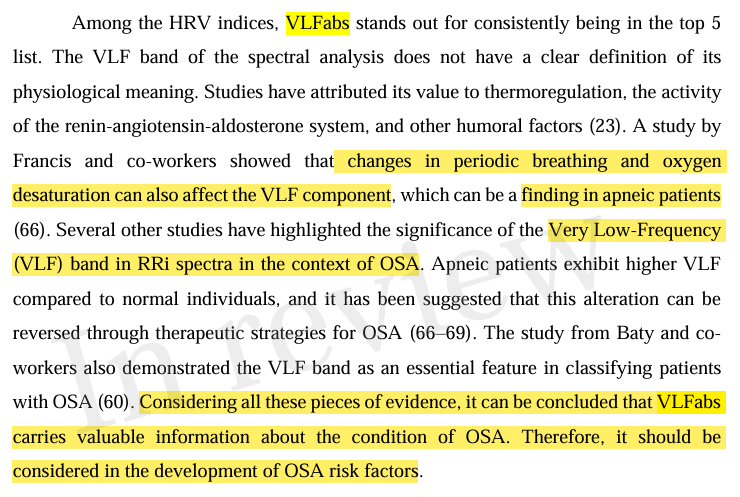

In [28]:
df_erros["VLFABS"]

5        49.5384
45      427.9893
66      848.5099
84      445.0917
104    1501.2190
126     209.6015
153     507.2266
155     784.2725
175    1061.5380
225     580.5907
238    2419.6928
245     676.0066
142     145.5113
159     291.2196
Name: VLFABS, dtype: float64

In [29]:
df_acertos["VLFABS"]

3       910.0456
7       437.7981
16      182.8438
18       93.9816
26      712.9390
29       71.0819
31      303.8456
60        5.5515
63      467.6652
94      127.8816
108     455.5005
110     902.0560
168      60.6448
180    2025.1014
227     408.8822
229    1774.5695
246     162.0450
248    2125.5619
281    4672.3809
91      118.7533
68      282.8788
211     596.0363
255    1307.0541
250     258.0978
231     432.4293
223    1562.1470
221    1436.8785
278    1147.9999
178    3456.6542
161      61.2314
156     263.0092
152     229.9007
Name: VLFABS, dtype: float64

# Aqui eu analisei no caso das contra-regras qual foi o conjunto operador e threshold que foi analisado sempre que o VLFABS aparece 

In [30]:
import pandas as pd
import re

# Carregar as tabelas
explicacoes_erros = pd.read_csv("C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/crules_ERROS_LORE.csv")

# Filtrar apenas as regras que mencionam VLFABS em alguma premissa
colunas_atributos = [col for col in explicacoes_erros.columns if "Atributo" in col]
mask = explicacoes_erros[colunas_atributos].apply(lambda x: "VLFABS" in x.values, axis=1)
df_vlfabs = explicacoes_erros[mask].copy()

# Criar um novo DataFrame contendo apenas as premissas com VLFABS
dados_filtrados = []

for _, row in df_vlfabs.iterrows():
    # Extrair o índice do indivíduo a partir do nome do arquivo (ex: "explicacao_104.txt" -> 104)
    match = re.search(r"_(\d+)\.txt", row["Arquivo"])
    idx = int(match.group(1)) if match else None

    novo_registro = {
        "Arquivo": row["Arquivo"],
        "Classe_Real": row["Classe_Real"],
        "Classe_Prevista": row["Classe_Prevista"],
        "VLFABS_Real": df_erros.loc[idx, "VLFABS"] if idx in df_erros.index else "UNKNOWN"
    }

    # Adicionar apenas as premissas que mencionam VLFABS
    for i in range(1, 27):  
        att_col = f"Premissa_{i}_Atributo"
        op_col = f"Premissa_{i}_Operador"
        val_col = f"Premissa_{i}_Valor"

        if att_col in row and row[att_col] == "VLFABS":
            novo_registro[f"VLFABS_{i}_Operador"] = row[op_col]
            novo_registro[f"VLFABS_{i}_Valor"] = row[val_col]

    dados_filtrados.append(novo_registro)

# Criar um DataFrame filtrado
df_vlfabs_filtrado = pd.DataFrame(dados_filtrados)

# Salvar o novo DataFrame
df_vlfabs_filtrado.to_csv("explicacoes_VLFABS_filtrado.csv", index=False)

# Exibir as primeiras linhas
df_vlfabs_filtrado

,Arquivo,Classe_Real,Classe_Prevista,VLFABS_Real,VLFABS_1_Operador,VLFABS_1_Valor,VLFABS_2_Operador,VLFABS_2_Valor,VLFABS_3_Operador,VLFABS_3_Valor
0,predições_104.txt,1,0,1501.219,>,901.481567,NaN,NaN,NaN,NaN
1,predições_104.txt,1,0,1501.219,<=,901.481567,>,304.244003,NaN,NaN
2,predições_126.txt,2,0,209.6015,<=,762.015991,NaN,NaN,NaN,NaN
3,predições_126.txt,2,0,209.6015,<=,928.507172,>,170.553711,NaN,NaN
4,predições_126.txt,2,0,209.6015,<=,928.507172,NaN,NaN,NaN,NaN
5,predições_126.txt,2,0,209.6015,<=,928.507172,>,170.553711,NaN,NaN
6,predições_126.txt,2,0,209.6015,<=,928.507172,>,170.553711,NaN,NaN
7,predições_142.txt,2,3,145.5113,NaN,NaN,<=,1028.424377,>,-1412.659485
8,predições_142.txt,2,3,145.5113,NaN,NaN,<=,1028.424377,NaN,NaN
9,predições_142.txt,2,3,145.5113,NaN,NaN,NaN,NaN,>,1028.424377


# No caso das regras qual foi o conjunto operador e threshold que foi analisado sempre que o VLFABS aparece 

In [31]:
import pandas as pd
import re

# Carregar as tabelas
explicacoes_erros = pd.read_csv("C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/explicacoes_csv/explicacoes_ERROS_LORE.csv")

# Filtrar apenas as regras que mencionam VLFABS em alguma premissa
colunas_atributos = [col for col in explicacoes_erros.columns if "Atributo" in col]
mask = explicacoes_erros[colunas_atributos].apply(lambda x: "VLFABS" in x.values, axis=1)
df_vlfabs = explicacoes_erros[mask].copy()

# Criar um novo DataFrame contendo apenas as premissas com VLFABS
dados_filtrados = []

for _, row in df_vlfabs.iterrows():
    # Extrair o índice do indivíduo a partir do nome do arquivo (ex: "explicacao_104.txt" -> 104)
    match = re.search(r"_(\d+)\.txt", row["Arquivo"])
    idx = int(match.group(1)) if match else None

    novo_registro = {
        "Arquivo": row["Arquivo"],
        "Classe_Real": row["Classe_Real"],
        "Classe_Prevista": row["Classe_Prevista"],
        "VLFABS_Real": df_erros.loc[idx, "VLFABS"] if idx in df_erros.index else "UNKNOWN"
    }

    # Adicionar apenas as premissas que mencionam VLFABS
    for i in range(1, 27): 
        att_col = f"Premissa_{i}_Atributo"
        op_col = f"Premissa_{i}_Operador"
        val_col = f"Premissa_{i}_Valor"

        if att_col in row and row[att_col] == "VLFABS":
            novo_registro[f"VLFABS_{i}_Operador"] = row[op_col]
            novo_registro[f"VLFABS_{i}_Valor"] = row[val_col]

    dados_filtrados.append(novo_registro)

# Criar um DataFrame filtrado
df_vlfabs_filtrado = pd.DataFrame(dados_filtrados)

# Salvar o novo DataFrame
df_vlfabs_filtrado.to_csv("explicacoes_VLFABS_filtrado.csv", index=False)

# Exibir as primeiras linhas
df_vlfabs_filtrado

,Arquivo,Classe_Real,Classe_Prevista,VLFABS_Real,VLFABS_1_Operador,VLFABS_1_Valor,VLFABS_2_Operador,VLFABS_2_Valor,VLFABS_5_Operador,VLFABS_5_Valor,VLFABS_3_Operador,VLFABS_3_Valor
0,explicacao_104.txt,1,0,1501.219,>,901.481567,NaN,NaN,NaN,NaN,NaN,NaN
1,explicacao_126.txt,2,0,209.6015,<=,928.507172,>,170.553711,NaN,NaN,NaN,NaN
2,explicacao_153.txt,2,0,507.2266,<=,948.837372,>,109.967548,NaN,NaN,NaN,NaN
3,explicacao_168.txt,2,1,UNKNOWN,<=,971.670013,NaN,NaN,NaN,NaN,NaN,NaN
4,explicacao_178.txt,2,0,UNKNOWN,NaN,NaN,>,934.894470,NaN,NaN,NaN,NaN
5,explicacao_225.txt,0,2,580.5907,NaN,NaN,NaN,NaN,<=,1496.909607,NaN,NaN
6,explicacao_245.txt,0,3,676.0066,<=,971.670013,NaN,NaN,NaN,NaN,NaN,NaN
7,explicacao_246.txt,0,2,UNKNOWN,<=,928.507172,NaN,NaN,NaN,NaN,NaN,NaN
8,explicacao_45.txt,3,2,427.9893,<=,958.690033,>,-786.930786,NaN,NaN,NaN,NaN
9,explicacao_5.txt,3,1,49.5384,NaN,NaN,NaN,NaN,NaN,NaN,<=,958.690033
